# Prospecção de Dados - Data Mining - DI/FCUL2022/2023

## Lab class TP02

# Naive Bayes and Linear Regression

*A Data Mining Tutorial by Andre Falcao (DI/FCUL 2021-2023)*

### Summary

1. Introduction to Naive-Bayes
2. The essence of Linear Regression
3. Appendix: Gaussian Naive Bayes


## 1. Introduction to Naïve Bayes


Naive Bayes is a simplification of Bayesian Learning by we assume all variables are independent. If that is the case we can just multiply the priors and the individual likelihoods. For instance for two different classes A, and B we can generate the Aposteriori Probability and select the class that gives the highst overal score

$P(i \in Class_A | x_i) \propto \prod_j{P(x_{ij} |i \in Class_A)}.P(Class_A)$

$P(i \in Class_B | x_i)  \propto \prod_j{P(x_{ij} |i \in Class_B)}.P(Class_B)$

A very simple implementation of Naive Bayes could be defined as this:

1. Calculate the priors of each class - If our data comes unbiasedly from a sampled population, these can be assumed by simply counting how many instances exist in each class
2. Compute the likelihoods. For all possible values in the dataset we just need to count the mumer of times each value appears in each class

A Naive Bayes Model is then just these two pieces of information. And for each new item we multiply the priors of the existing values and the priors to have an estimation of the posterior

A simple implementation that would receive a traditional table dataset and would compute a model (priors and likelihoods) that could be used for classification would be very simple in python

In [1]:
import numpy as np
import pandas as pd

In [2]:
def PD_NB(X, y):
    N, M=X.shape

    yv, yc=np.unique(y, return_counts=True)
    priors={yv[i]: yc[i]/sum(yc) for i in range(len(yv)) }

    L_hoods={}
    for j in range(M):
        xs=np.unique(X[:,j])
        for v in xs:
            for yi in yv: L_hoods[(j, v,  yi)]=0.0

    for yi in yv:
        X_c = X[y==yi]
        #...now search each individual X column
        for j in range(M):
            col = X_c[:,j]
            vs, cs = np.unique(col, return_counts=True)
            # ...for each possible value now we divide it all
            for i, v in enumerate(vs):
                L_hoods[(j, v,  yi)] = cs[i]/np.sum(cs)
    

    return priors, L_hoods

#### Exercises
1. Identify the prior construction part in the above function

 - use numpy to count <br>
 - create a dictionary with pairs **{value} : {probability}**

2. Identify the construction of the Likelihoods

 - first loops initialize likelyhoods with $0$
 - second loops calculate the likelyhoods

3. What is the complexity of each part?

 - 1. $O(M \cdot k)$
 - 2. $O(M \cdot k \cdot l)$

4. What are the drawbacks of the above implementation for a large scale application?

 - $X$ size. Multiple filters over all $X$ and $y$ rows --> $O(N^k)$

We can visualise out model with a simple function

In [3]:
def show_NB(priors, L_hoods):
    print("Priors are:")
    for yi in priors:
        print("\tP(Y = %s) = %7.4f" % (yi, priors[yi]))
    print("Likelyhoods:")
    for i, xi, yi in L_hoods:
        print("\tP(X%d = %s | Y = %s) = %7.4f" % (i, xi, yi, L_hoods[(i,xi,yi)]))

With the Priors and the likelihoods(the "Model") we can make predictions, which is just to compute the posterior probabilities, given the assumptions of the Naive Bayes approach

The function below will compute and output the posterior probabilities

In [4]:
def calc_posterior(data, priors, L_hoods):
    probs=np.zeros(len(priors))
    for j, yp in enumerate(priors.keys()):
        probs[j]=priors[yp]
        for i, d in enumerate(data): probs[j]*=L_hoods[(i, d, yp)]
    #scaling to 1.0
    probs=probs/np.sum(probs)
    return {yp: probs[j] for j, yp in enumerate(priors.keys())}


### Testing the above approach with the (in)famous iris dataset

This is the simplest of all toy datasets, but it will cover one important thing: **How to make predictions when we have continuous data.** The solution is to discretize the available data into classes and then use a one-hot encoding for each class.


In [5]:
from sklearn.datasets import load_iris

data=load_iris()
cnames=data.feature_names
X0=data.data
class_names=data.target_names
y_iris=data.target_names[data.target]
X_iris=np.empty(X0.shape,dtype="object")
X_iris[:,:]="Medium"
for i,cname in enumerate(cnames):
    q33, q67=np.quantile(X0[:,i], (0.33, 0.67))
    X_iris[X0[:,i]<q33, i]="Small"
    X_iris[X0[:,i]>q67, i]="Large"

#here is some sample data from the dataset
for i in range(0, len(X_iris), 20):
    print(X_iris[i], "---->", y_iris[i])


['Small' 'Large' 'Small' 'Small'] ----> setosa
['Medium' 'Large' 'Small' 'Small'] ----> setosa
['Small' 'Large' 'Small' 'Small'] ----> setosa
['Small' 'Small' 'Medium' 'Medium'] ----> versicolor
['Medium' 'Small' 'Medium' 'Medium'] ----> versicolor
['Medium' 'Large' 'Large' 'Large'] ----> virginica
['Large' 'Medium' 'Large' 'Large'] ----> virginica
['Large' 'Medium' 'Large' 'Large'] ----> virginica


Now we can make the model, given the data (X and y)

In [7]:
priors, L_hoods = PD_NB(X_iris, y_iris)

In [8]:
show_NB(priors, L_hoods)

Priors are:
	P(Y = setosa) =  0.3333
	P(Y = versicolor) =  0.3333
	P(Y = virginica) =  0.3333
Likelyhoods:
	P(X0 = Large | Y = setosa) =  0.0000
	P(X0 = Large | Y = versicolor) =  0.2200
	P(X0 = Large | Y = virginica) =  0.6200
	P(X0 = Medium | Y = setosa) =  0.2000
	P(X0 = Medium | Y = versicolor) =  0.6800
	P(X0 = Medium | Y = virginica) =  0.3600
	P(X0 = Small | Y = setosa) =  0.8000
	P(X0 = Small | Y = versicolor) =  0.1000
	P(X0 = Small | Y = virginica) =  0.0200
	P(X1 = Large | Y = setosa) =  0.6600
	P(X1 = Large | Y = versicolor) =  0.0400
	P(X1 = Large | Y = virginica) =  0.1600
	P(X1 = Medium | Y = setosa) =  0.3200
	P(X1 = Medium | Y = versicolor) =  0.4200
	P(X1 = Medium | Y = virginica) =  0.4600
	P(X1 = Small | Y = setosa) =  0.0200
	P(X1 = Small | Y = versicolor) =  0.5400
	P(X1 = Small | Y = virginica) =  0.3800
	P(X2 = Large | Y = setosa) =  0.0000
	P(X2 = Large | Y = versicolor) =  0.0400
	P(X2 = Large | Y = virginica) =  0.8800
	P(X2 = Medium | Y = setosa) =  0.0000
	

let's test the model with two randomly selected flowers 

In [9]:
data=[["Medium", "Large", "Medium", "Large"], ["Small", "Large", "Small", "Small"]]
for d in data:
    res =calc_posterior(d, priors, L_hoods)
    print("Caso: ", d)
    cur_best=(-999,"x")
    for yi in res:
        if (res[yi], yi)>cur_best: cur_best=(res[yi], yi)
        print("\tP(Y = %s | X=%s )= %7.4f"% (yi, d, res[yi]))
    print("\t==> Best is:", cur_best[1])


Caso:  ['Medium', 'Large', 'Medium', 'Large']
	P(Y = setosa | X=['Medium', 'Large', 'Medium', 'Large'] )=  0.0000
	P(Y = versicolor | X=['Medium', 'Large', 'Medium', 'Large'] )=  0.1411
	P(Y = virginica | X=['Medium', 'Large', 'Medium', 'Large'] )=  0.8589
	==> Best is: virginica
Caso:  ['Small', 'Large', 'Small', 'Small']
	P(Y = setosa | X=['Small', 'Large', 'Small', 'Small'] )=  1.0000
	P(Y = versicolor | X=['Small', 'Large', 'Small', 'Small'] )=  0.0000
	P(Y = virginica | X=['Small', 'Large', 'Small', 'Small'] )=  0.0000
	==> Best is: setosa


### Exercises
The last example fitted is very obviously of the "setosa" species, but there is no possibility of being of any other class?
1. Identify why is that the case
 - Laplace Smoothing
2. What technique could we use for at least admitting that possibility
3. Implement it in Python, by changing the PD_NB function
4. test the new model with the same examples and do some sensitivity analyisis

In [16]:
idx = np.all(X_iris==['Small', 'Large', 'Small', 'Small'], axis=1)
y_iris[idx]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype='<U10')

In [82]:
#####!!!!!!!!!!!!!!!!! SOLUTION of exercise 3
def PD_NB(X, y, α = 0.01):
    N, M=X.shape
    
    yv, yc=np.unique(y, return_counts=True)
    priors={yv[i]: yc[i]/sum(yc) for i in range(len(yv)) }

    L_hoods={}
    for j in range(M):
        xs=np.unique(X[:,j])
        for v in xs:
            for yi in yv: L_hoods[(j, v,  yi)]=α

    for yi in yv:
        X_c = X[y==yi]
        #...now search each individual X column
        for j in range(M):
            col = X_c[:,j]
            vs, cs = np.unique(col, return_counts=True)
            # ...for each possible value now we divide it all
            for i, v in enumerate(vs):
                L_hoods[(j, v,  yi)] += (cs[i])/( np.sum(cs) )


    return priors, L_hoods


In [94]:
priors, L_hoods = PD_NB(X_iris, y_iris, α=0.1)

In [96]:
######!!!!!!!!!!!!!!!!!SOLUTION of exercise 4
data=[["Medium", "Large", "Medium", "Large"], ["Small", "Large", "Small", "Small"]]
for d in data:
    res =calc_posterior(d, priors, L_hoods)
    print("Caso: ", d)
    cur_best=(-999,"x")
    for yi in res:
        if (res[yi], yi)>cur_best: cur_best=(res[yi], yi)
        print("\tP(Y = %s | X=%s )= %7.4f"% (yi, d, res[yi]))
    print("\t==> Best is:", cur_best[1])

Caso:  ['Medium', 'Large', 'Medium', 'Large']
	P(Y = setosa | X=['Medium', 'Large', 'Medium', 'Large'] )=  0.0503
	P(Y = versicolor | X=['Medium', 'Large', 'Medium', 'Large'] )=  0.3575
	P(Y = virginica | X=['Medium', 'Large', 'Medium', 'Large'] )=  0.5921
	==> Best is: virginica
Caso:  ['Small', 'Large', 'Small', 'Small']
	P(Y = setosa | X=['Small', 'Large', 'Small', 'Small'] )=  0.9993
	P(Y = versicolor | X=['Small', 'Large', 'Small', 'Small'] )=  0.0003
	P(Y = virginica | X=['Small', 'Large', 'Small', 'Small'] )=  0.0004
	==> Best is: setosa


## Running Naive Bayes for large datasets

Naive Bayes is a robust algorithm that can be used for very large algorithms, for which the simplistic table based approximation followed is not adequate.

Many times, an instance in real life is just the specification that something happened, like a list of items in a basket or the set of words in a document. And of course any table, like the one above, can be transformed in such a description

### Discriminating between SPAM and HAM in a small email dataset

Here are going ot use the [SPAM and HAM Dataset from Kaggle](https://www.kaggle.com/datasets/veleon/ham-and-spam-dataset) with 2551 emails that are not spam (HAM) and 501 SPAM emails. and we are going to use the presence of words to make a simple Naive-Bayes spam filter.

The data was previously processed so that the basic texts from the emails are extracted for each message Even though we could use all the words from the text [the dataset of all the words is actually present in this folder] we are just going to use the words from the subjects for our model



We can have a glimpse of the data and some of the actual problems still extant [which we are not going to solve!]

In [97]:
import pickle
word_sbs, labs = pickle.load(open("subjects.pickle", "rb"))
for i in range(0, len(word_sbs), 500):
    print(i, labs[i], "--->", word_sbs[i])

0 1 ---> {'insurance', 'why', 'life', 'more', 'pay'}
500 1 ---> {'fortune', 'a', 'on', 'make', 'ebay'}
1000 0 ---> {'wedded', 'was', 're:', 'ouch', 'bliss', 'selling'}
1500 0 ---> {'bug', 're:', 'exmh'}
2000 0 ---> {'re:', 'mail', 'spamm', 'is', 'users', 'empty', 'razor'}
2500 0 ---> {'�', 'houses', 'a', 'rise', 'week'}


In [101]:
pd.Series(labs).value_counts()

0    2166
1     502
dtype: int64

### Make a sparkling new Bayesian classifier for SPAM detection

The steps we defined above are exaclty the same as before.
1. First compute the priors
2. then compute the likelihoods

For the priors we are going to assume that each class has a unique ID from 0 to K. Here we just have two classes [0,1] for HAM and SPAM, respectively.

One important detail is that we are going to keep our functions updateable, so we are going to output the actual counts and not the actual probalilities. To compute them we will have to divide the results by the sum of the priors

In [98]:
def calc_prior_counts(labels):
    yv, yc=np.unique(labels, return_counts=True)
    priors=np.ones(len(yv))
    priors[yv]=yc
    return priors

PC = calc_prior_counts(labs)
print("Class Priors:", PC/PC.sum())

Class Priors: [0.81184408 0.18815592]


for computing the likelihood counts we will need first an initialization function for structuring the number of times a word appears on a email of class K. For doing that we need to get all the words in this corpus, and we will use a previously created function

In [102]:
def calc_all_words(words_text_sets):
    #joins all the words from lists of words in documents to get a unique set of all the words
    all_words=set()
    for words in words_text_sets: all_words |= words
    return all_words


def init_likelihood_counts(docs_words, n_labels):
    all_words=calc_all_words(docs_words)
    L_hoods={}
    for w in all_words:
        L_hoods[w]=np.zeros(n_labels)
    return L_hoods


Similarly to the priors we are going to compute the counts of SPAM/HAM documents for each word.

Our calc_likelihood function will work in a such a way that it can be trivially updated as more data arrives and we can update our model with it

In [103]:

def update_likelihood_counts(L_hoods, words, label):
    for word in words: 
        L_hoods[word][label]+=1

def calc_likelihood_counts(docs_words, labels):
    n_labels=len(set(labels)) #!!! <- not very bright!
    L_hoods = init_likelihood_counts(docs_words, n_labels)
    for i, words in enumerate(docs_words): 
        update_likelihood_counts(L_hoods, words, labels[i])
    return L_hoods

LHC=calc_likelihood_counts(word_sbs, labs)

#take a glimpse of the word counts for each word
words=list(LHC.keys())
for i in range(0, len(words), int(len(words)/15)):
    print(words[i], "--->", LHC[words[i]])

hittin' ---> [1. 0.]
gillmor: ---> [1. 0.]
bowers: ---> [1. 0.]
doctors ---> [0. 3.]
cypriot ---> [1. 0.]
client ---> [7. 0.]
fw: ---> [11. 10.]
until ---> [0. 1.]
videogame ---> [1. 0.]
pcs ---> [2. 0.]
_audio ---> [1. 0.]
sendmail ---> [7. 0.]
xosd ---> [1. 0.]
junk ---> [2. 0.]
handheld ---> [0. 1.]
bridge ---> [2. 0.]


Now we have both pieces and we can classify any new email for which we have its subject 

Two important issues:

1. notice that we are puting the Regularization constant (alpha) only here, this is important if we are basing our model on counts and not probabilities
2. Notice also what happens if a word does not exist in the corpus - It is basically ignored! If no word exists, the classifier will just output the priors



In [105]:
def classify_new_document(words, priors, L_hoods, α=0.01):
    res=priors/priors.sum()
    alpha_vec=np.ones(len(res))*α
    for word in words:
        if word in L_hoods: 
            res*=(L_hoods[word]/L_hoods[word].sum() + alpha_vec)
    return res/res.sum()

words = word_sbs[50]
classify_new_document(words, PC, LHC), words

(array([0.99585283, 0.00414717]), {'at', 'get', 'in', 'the', 'top'})

Let's see exactly how good our model is by splitting our dataset into a training set and testing sets, fiting the model with the former and evaluating it with the later

In [236]:
from random import sample, shuffle
def make_train_test(X, y, r=0.25 ):
    N=len(X)
    test_idx  = set(sample(range(N), int(N*r)))
    train_idx = list(set(range(N)) - test_idx)
    test_idx =list(test_idx)
    shuffle(train_idx)
    shuffle(test_idx)
    train_set_X = [X[i] for i in train_idx]
    train_set_y = [y[i] for i in train_idx]
    test_set_X = [X[i] for i in test_idx]
    test_set_y = [y[i] for i in test_idx]
    return train_set_X, train_set_y, test_set_X, test_set_y

def make_train_test(X, y, r=0.25 ):
    N=len(X)
    D=list(range(N))
    shuffle(D)
    train_set_X = [X[i] for i in D[int(N*r):]]
    train_set_y = [y[i] for i in D[int(N*r):]]
    test_set_X = [X[i] for i in D[:int(N*r)]]
    test_set_y = [y[i] for i in D[:int(N*r)]]
    return train_set_X, train_set_y, test_set_X, test_set_y

word_sbs_train, labs_train, word_sbs_test, labs_test = make_train_test(word_sbs, labs, r=0.3)


In [237]:
PC = calc_prior_counts(labs_train)
LHC=calc_likelihood_counts(word_sbs_train, labs_train)

In [238]:
def classify_documents(docs, priors, L_hoods, alpha=0):
    return [classify_new_document(words, priors, L_hoods, alpha).argmax(axis=0) for words in docs]


preds=classify_documents(word_sbs_test, PC, LHC, alpha=0.0001)

Let's just look at the predictions according to the words for the first 20 documents

In [239]:
len(word_sbs_test)

800

In [240]:
from time import time
times = []
for i in range(1,1334,20):
    start = time()
    classify_documents(word_sbs_test[:i], PC, LHC, alpha=0.001)
    times.append(time()-start)

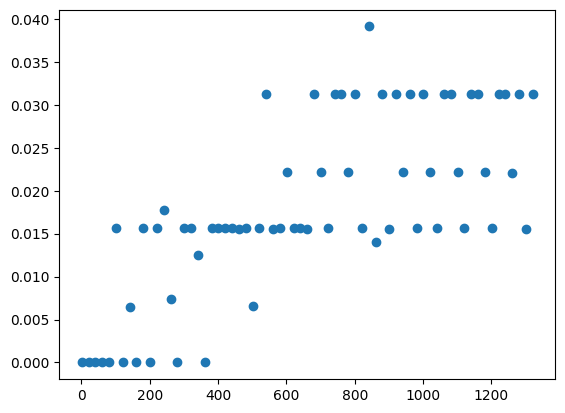

In [241]:
import matplotlib.pyplot as plt

plt.scatter(range(1,1334,20), times)

In [242]:
times[0]

0.0

In [243]:
for i, words in enumerate(word_sbs_test[:20]):
    print(i, "--", preds[i], "<--", words)

0 -- 0 <-- {'sf', 'date', ':', 'ultimate', 're:', "weekly's", 'lineup'}
1 -- 0 <-- {'/home/dude', 're:'}
2 -- 0 <-- {'worrying', 'about', 'worth', 'why', 'decentralization', 'is'}
3 -- 0 <-- {'system', 'amazoncom', 'protec', 'honor', 'hoping', 'the', 'to', 'use', 'newscom:', 'is', 'than', 'more'}
4 -- 0 <-- {'was:', 'java', 'signers', 're:', 'for', 'angry', 'men', 'is', 'kiddies', 'young', "weren't"}
5 -- 0 <-- {'matey', 'avast', 're:', 'there'}
6 -- 0 <-- {'wedded', 'was', 're:', 'ouch', 'bliss', 'selling'}
7 -- 0 <-- {'day', 'a', 'for', 'stupid'}
8 -- 0 <-- {'nightly', 'hit', 'check', 'sadev', 're:', 'and', 'mass', 'frequencies'}
9 -- 0 <-- {'brown', 'accused', 'of', 'regional', 'museums', 'on', 'backtracking'}
10 -- 0 <-- {'saucedagain', 'apple', 're:'}
11 -- 0 <-- {'of', 're:', 'hashes', 'users', 'collision', 'razor'}
12 -- 0 <-- {'us', 'breaking', 'un', 'of', 'support', 'so', 'obey', 'resolutions', 'to', 'for', 'punish', 'gather', 'can', 'orders', 'saddam', 'sharon', 'bush'}
13 --

As for evaluating our model we are going to use [Scikit Learn metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

In [244]:
from sklearn.metrics import f1_score, matthews_corrcoef, confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

print("The accuracy score is: %7.4f" % accuracy_score(labs_test, preds))
print("The F1 score is: %7.4f" % f1_score(labs_test, preds))
print("The MCC score is: %7.4f" % matthews_corrcoef(labs_test, preds))
print("The precision score is: %7.4f" %  precision_score(labs_test, preds))
print("The recall score is: %7.4f" %  recall_score(labs_test, preds))



The accuracy score is:  0.9200
The F1 score is:  0.7241
The MCC score is:  0.7112
The precision score is:  0.9655
The recall score is:  0.5793


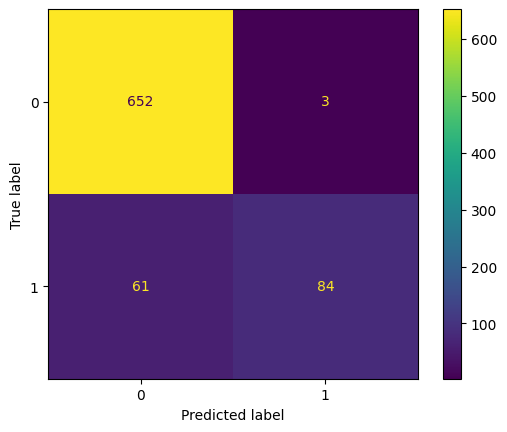

In [245]:
ConfusionMatrixDisplay(
    confusion_matrix(labs_test, preds)
).plot()

#### Exercises
1. Comment the results above
2. Analise the performance of the above algorithm. How does it scale? Does the number of "variables" have an impact on the overal model time performance?
3. [to do at home] What is the overal impact of using the words of the message content for the same analysis? Test your asumptions with the `content.pickle` data set with email content data from the same dataset

### Using Tabular data with the new implementation

Now that we have a generic Naive Bayes classifier, we can try it with the Iris again, but changing the dataset so that it will become a set of transactions

In [137]:
data=load_iris()
cnames=data.feature_names
X0=data.data
class_names=data.target_names
y_iris=data.target
X_iris=np.empty(X0.shape,dtype="object")
for i,cname in enumerate(cnames):
    X_iris[:,i] = cname + ":Medium"
    q33, q67=np.quantile(X0[:,i], (0.33, 0.67))
    X_iris[X0[:,i]<q33, i]=cname+":Small"
    X_iris[X0[:,i]>q67, i]=cname+":Large"

iris_transactions=[set(X_iris[i,:].tolist()) for i in range(X_iris.shape[0])]


In [139]:
PC = calc_prior_counts(y_iris)
LHC=calc_likelihood_counts(iris_transactions, y_iris)
PC, LHC

(array([50., 50., 50.]),
 {'petal length (cm):Large': array([ 0.,  2., 44.]),
  'sepal width (cm):Medium': array([16., 21., 23.]),
  'sepal width (cm):Small': array([ 1., 27., 19.]),
  'petal width (cm):Medium': array([ 0., 48.,  4.]),
  'petal width (cm):Small': array([50.,  0.,  0.]),
  'petal length (cm):Small': array([50.,  0.,  0.]),
  'sepal width (cm):Large': array([33.,  2.,  8.]),
  'sepal length (cm):Large': array([ 0., 11., 31.]),
  'petal length (cm):Medium': array([ 0., 48.,  6.]),
  'petal width (cm):Large': array([ 0.,  2., 46.]),
  'sepal length (cm):Small': array([40.,  5.,  1.]),
  'sepal length (cm):Medium': array([10., 34., 18.])})

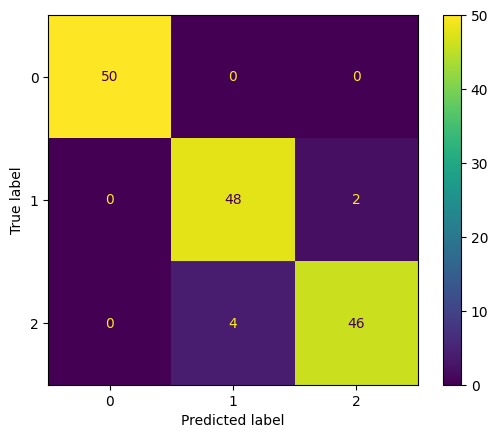

In [140]:
preds=classify_documents(iris_transactions, PC, LHC)
ConfusionMatrixDisplay(confusion_matrix(y_iris, preds)).plot()

## 2. Linear Regression

### 2.1. Computing Linear regression manually

We know that the parameters of a linear model can be computed according to the equation

$\beta = (X^T.X)^{-1}.X^T.Y $ 


The function below assumes we have one suplementatry column of ones, which will account for the bias

In [141]:
def make_linear_model(X, y):
    #first compute the transpose
    Xtt = X.T
    # now we will compute the Gram matrix (X.T @ X)
    gram = Xtt @  X                     #[M.M]
    # which is then inverted
    gram_inv = np.linalg.inv(gram)      #[M.M]
    #Now we multiply it again by X.T    
    X_part = np.dot(gram_inv,Xtt)       #
    Beta_est=np.dot(X_part, y_train)
    return Beta_est

#### Exercises
1. What is the part of the above computation that is the hardest to to compute. Hint: Think about the dimensions of the elements
    - gram matrix
2. what if your dataset contains many thousands of columns, but comparatively few rows?
    - gram multiplyed by X.T (?)
3. Discuss how this could be implemented using partial multiplications using `Ray` or `multiprocessing`
    - Compute each element of the new matrix each time (?). Dot product / process
#### An example of executing the above code

Let's check it out for the [diabetes dataset form the toy examples of sckikit learn](https://scikit-learn.org/stable/datasets/toy_dataset.html) that has 10 independent variables

In [142]:
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes=load_diabetes(return_X_y=True)

pd.DataFrame(X_diabetes)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


To use this procedure we first need to add one **ONE** column to the whole dataset that will emcompass the the bias of the model (intercept)

In [161]:
from sklearn.model_selection import train_test_split

X1 = np.insert(X_diabetes, 0, 1, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X1, y_diabetes, test_size=0.33, random_state=22)


In [162]:
coefs = make_linear_model(X_train, y_train)
print("The bias is: ", coefs[0])
print("The other parameters are:\n", coefs[1:])


The bias is:  151.46118603018388
The other parameters are:
 [  21.36566678 -280.55342835  487.08099359  322.64974813 -557.16364122
  330.79660445 -183.03578001   39.13607284  656.87736459  117.3693665 ]


Let's just make some simple prediction as the "`predict`" function is just simply the dot product of the coefficients and the X matrix of the testing set

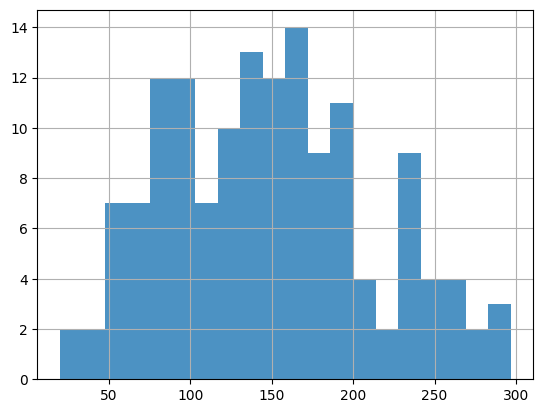

In [163]:
import matplotlib.pyplot as plt
my_preds=np.dot(X_test,coefs)
plt.hist(my_preds, bins=20, alpha=.8)
plt.grid()
plt.show()

Let's first create a simple function that outputs the classification results using scikit-learn's implementations. We will use
* The Ratio of the Variance Explained
* The RMSE
* The Pearson Correlation Score
* The Maximum absolute Error
* The Mean absolute Error


In [164]:
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score, max_error, mean_absolute_error
from scipy.stats import pearsonr

def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))




In [165]:
printRegStatistics(y_test, my_preds)

The RVE is:  0.5108366200843056
The rmse is:  54.52268460842509
The Correlation Score is is: 0.7194 (p-value=1.493611e-24)

The Maximum Error is is:  159.0056099346001
The Mean Absolute Error is:  42.02806937184886


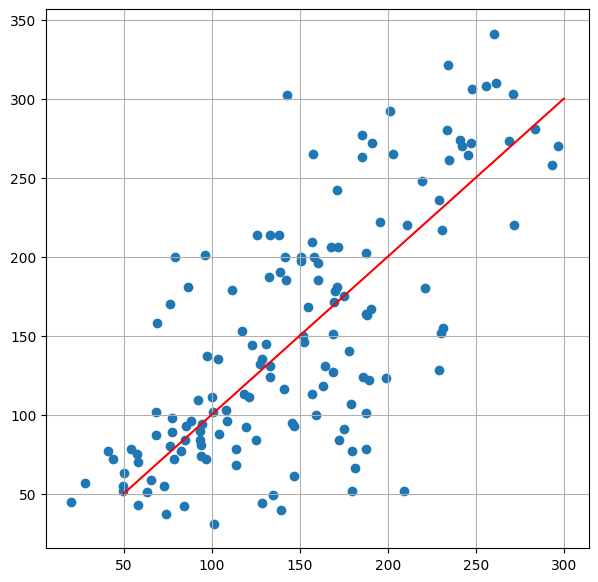

In [166]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(my_preds, y_test)
plt.grid()
#this is the 45degrees angle. The closer the predictions approach this, the better the model
plt.plot([50, 300], [50, 300], c="r")
plt.show()

## Appendix: Gaussian Naive Bayes
### Naive Bayes for Continuous dimensions - Gaussian Naive Bayes

Assuming a Gaussian distribution of the independent variables, it is very simple to make a Bayesian classifier. Given 2 classes A and B, the probability that instance i is in class A can be computed as the product of the likelyhood and the priors, yet the likelihoods are computed from the normal function of the independent variables


$P(i \in Class_A | x_i) \propto \prod_j{P(x_{ij} |i \in Class_A)}.P(Class_A)$

$P(i \in Class_B | x_i)  \propto \prod_j{P(x_{ij} |i \in Class_B)}.P(Class_B)$

Therefore we need some functions that, given any dataset, are able to:

* compute overal statistics for parametrization of the Gaussians and priors `get_class_stats()`
* compute the Gaussian functions given the stats for each class `get_gaussians()`
* Compute the priors given the priors `get_priors()`

In [167]:
from scipy.stats import norm

#this function will compute the means and std deviations for all classes
def get_class_stats(X, y):
    classes=list(set(y))
    N,M=X.shape
    stats={c: None for c in classes}
    for c in classes:
        mX = X[y==c,:]
        means = np.mean(mX, axis=0)
        stds  = np.sqrt(np.var(mX, axis=0))
        count,_=mX.shape
        stats[c]=(count, means, stds)
    return stats
    
#this function will get all the gaussians: One for each variable, class combination
def get_gaussians(stats):
    gaussians={}
    for c in stats:
        N, means, stds=stats[c]
        gaussians[c]=[norm(loc=mean, scale=stds[i]) for i, mean in enumerate(means)]
    return gaussians

def get_priors(stats):
    priors = {}
    total  = 0
    for c in stats:
        N, means, stds=stats[c]
        priors[c]=N
        total+=N
    for c in priors: priors[c]/=total
    return priors


In [168]:
def gnb_predict(Xtst, priors, gaussians):
    N,M = Xtst.shape
    res         = -np.ones(N)
    final_preds = -np.zeros(N)
    final_preds=final_preds.astype(str)
    for c in gaussians:
        preds=np.ones(N)*priors[c]
        for col in range(M): preds*=gaussians[c][col].pdf(Xtst[:,col])
        final_preds[preds>res]=c
        res[preds>res]=preds[preds>res]
    return final_preds


Running Gaussian Naive Bayes with the Iris dataset (or any similar type of problem) is actually much simpler as we do not need to discretize the data

The global accuracy is:  0.9600
The global mcc is:  0.9396


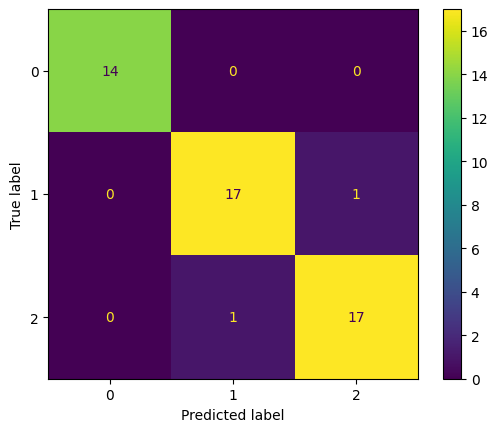

In [174]:
from sklearn.model_selection import train_test_split

X_iris, y_iris = load_iris(return_X_y = True) 

X_train, X_test, y_train, y_test = train_test_split(X_iris,y_iris, test_size=0.33, random_state=22)

stats = get_class_stats(X_train,y_train)
gaussians= get_gaussians(stats)
priors = get_priors(stats)
preds = gnb_predict(X_test, priors, gaussians)
preds=preds.astype(int)  #we need to convert the data to integers

print("The global accuracy is: %7.4f" % accuracy_score(y_test, preds))
print("The global mcc is: %7.4f" % matthews_corrcoef(y_test, preds))

ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot()

## Email Content

In [178]:
emails, classes = pickle.load(open("content.pickle", "rb"))

In [269]:
class NB:
    def __init__(self, α=0.01):
        self.priors : list= None
        self.likelihoods : dict = {}
        self.α: float = α
    
    def fit(self, X, y):
        self.n_labels = len(np.unique(y))
        self._calculate_likelihoods(X, y)
        self._calculate_priors(y)
        return self
    
    def _get_all_words(self, word_sets):
        all_words = set()
        for words in word_sets:
            all_words|=words
        return all_words
    
    def _init_lhc(self, X):
        all_words = self._get_all_words(X)
        for word in all_words:
            self.likelihoods[word] = np.zeros(self.n_labels)
    
    def _calculate_likelihoods(self, X, y):
        self._init_lhc(X)
        for i, words in enumerate(X):
            for word in words:
                    self.likelihoods[word][y[i]]+=1
    
    def _calculate_priors(self, y):
        values, counts = np.unique(y, return_counts=True)
        self.priors = np.zeros(self.n_labels)
        self.priors[values] = counts
    
    def _classify(self, document):
        res = self.priors/self.priors.sum()
        alphas = np.ones(self.n_labels) * self.α
        for word in document:
            if word in self.likelihoods:
                res *= (self.likelihoods[word] / self.likelihoods[word].sum() + alphas)
        return res/res.sum()
    
    def predict(self, X):
        return [
            np.argmax(self._classify(doc)) for doc in X
        ]

In [274]:
X_train, X_test, y_train, y_test = train_test_split(emails, classes, test_size=0.3, random_state=0)

In [275]:
model = NB().fit(X_train, y_train)

In [276]:
preds = model.predict(X_test)

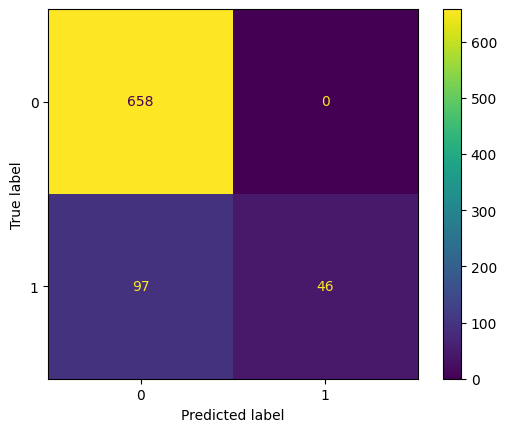

In [277]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, preds)
).plot()